# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [98]:
%matplotlib inline

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join(os.getcwd(), "output_data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

583

In [85]:
# creating dataframe for city & coordinates to merge with weather data
city_locations = zip (cities, keep_lat, keep_lng)
city_locs_df = pd.DataFrame(city_locations, columns=['City', 'Latitude', 'Longitude'])
city_locs_df

,City,Latitude,Longitude
0,taolanaro,-87.05,62.73
1,barentsburg,73.48,14.18
2,attawapiskat,58.76,-83.79
3,dikson,86.59,68.59
4,barstow,34.79,-117.13
...,...,...,...
578,bonavista,51.58,-52.29
579,ranong,9.48,97.29
580,marsh harbour,29.18,-76.69
581,copiapo,-28.45,-68.77


In [68]:
cities

['kimbe',
 'illoqqortoormiut',
 'atuona',
 'tasiilaq',
 'lebowakgomo',
 'chuy',
 'starosubkhangulovo',
 'upernavik',
 'mataura',
 'georgetown',
 'puerto ayora',
 'rikitea',
 'ajaccio',
 'taolanaro',
 'thinadhoo',
 'barrow',
 'russkaya polyana',
 'pevek',
 'salalah',
 'pringsewu',
 'west bay',
 'luderitz',
 'khatanga',
 'okha',
 'isangel',
 'lazaro cardenas',
 'nenjiang',
 'yellowknife',
 'xining',
 'ushuaia',
 'hilo',
 'yeppoon',
 'kutum',
 'souillac',
 'talara',
 'port macquarie',
 'kruisfontein',
 'port elizabeth',
 'saldanha',
 'sept-iles',
 'punta arenas',
 'imeni poliny osipenko',
 'clovis',
 'hithadhoo',
 'dien bien',
 'nikolskoye',
 'avarua',
 'acari',
 'faanui',
 'mar del plata',
 'cabatuan',
 'micheweni',
 'ilulissat',
 'fort saint john',
 'dalbandin',
 'yumen',
 'miyako',
 'vaini',
 'ancud',
 'calbuco',
 'dikson',
 'lebu',
 'butaritari',
 'zhanaozen',
 'bethel',
 'louisbourg',
 'jamestown',
 'ossora',
 'kaitangata',
 'port lincoln',
 'sao joao da barra',
 'padang',
 'iquique'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [191]:
# build api call
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# initializing lists for data
temperature = []
max_temp = []
humidity = []
cloudy = []
wind_speed = []
save_city = []
save_lat = []
save_lng = []
country = []
save_time = []
save_timezone = []

In [192]:
# Loop through the list of cities
rec_num = 0
# set_num = 1 # not entirely sure there's a benefit to having different sets as it just seems to be blocks of 50

for this_city in cities:
     # Build query URL based on current element in units
    try: 
        query_url = f"{url}appid={weather_api_key}&units={units}&q={this_city}"
 
        rec_num = rec_num + 1

        print(f"Pulling information on {this_city}, Record # {rec_num}")
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get temperature from JSON response & add to the temperature list
        this_temp = weather_json['main']['temp']
        temperature.append(this_temp)
        this_maxtemp = weather_json['main']['temp_max']
        max_temp.append(this_maxtemp)

        # get humidity (%) & add to the humidity list
        this_humid = weather_json["main"]["humidity"]
        humidity.append(this_humid)

        # get cloudiness (%) & add to cloudiness list
        this_cloud = weather_json["clouds"]["all"]
        cloudy.append(this_cloud)

        # wind speed (mph) & add to list
        this_wind = weather_json["wind"]["speed"]
        wind_speed.append(this_wind)

        # make sure city goes into list & coordinates
        save_city.append(this_city)
        this_lat = weather_json["coord"]["lat"]
        save_lat.append(this_lat)
        this_lng = weather_json["coord"]["lon"]
        save_lng.append(this_lng)

        # save country & time of data calculation
        this_country = weather_json["sys"]["country"]
        country.append(this_country)
        this_time = weather_json["dt"]
        save_time.append(this_time)
        this_timezone = weather_json["timezone"]
        save_timezone.append(this_timezone)

    
    except KeyError:
        print(f"{this_city} not found. Searching for next city...")
        pass


earching for next city...
Pulling information on teeli, Record # 179
Pulling information on la tuque, Record # 180
Pulling information on arawa, Record # 181
Pulling information on snezhnogorsk, Record # 182
Pulling information on bongor, Record # 183
Pulling information on saint-philippe, Record # 184
Pulling information on sicuani, Record # 185
Pulling information on nikolskoye, Record # 186
Pulling information on khasan, Record # 187
Pulling information on eureka, Record # 188
Pulling information on acaponeta, Record # 189
Pulling information on waitati, Record # 190
Pulling information on cidreira, Record # 191
Pulling information on terrace, Record # 192
Pulling information on grand bank, Record # 193
Pulling information on aksha, Record # 194
Pulling information on ostrovnoy, Record # 195
Pulling information on port hardy, Record # 196
Pulling information on togur, Record # 197
Pulling information on grand haven, Record # 198
Pulling information on salinopolis, Record # 199
Pulli

In [196]:
this_city

'laurel'

In [197]:
len(save_city)

543

In [198]:
output_data_file

'/Users/juliebaker/Desktop/python-api-challenge/WeatherPy/output_data/cities.csv'

In [199]:
# compile data into single csv
output_weather = zip(save_city, save_lat, save_lng, temperature, max_temp, humidity, cloudy, wind_speed, country, save_time, save_timezone)
weather_df = pd.DataFrame(output_weather, columns=['City', 'Latitude', 'Longitude', 'Temperature (F)', 'Maximum Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)', 'Country', 'Time', 'Time Zone'])

# write csv 
with open (output_data_file, 'w') as wtf:
    weather_df.to_csv(output_data_file, encoding='utf-8')

In [208]:
# looking at data
weather_df.head()

,City,Latitude,Longitude,Temperature (F),Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Time,Time Zone
0,dikson,73.5069,80.5464,32.00,32.00,84,0,5.03,RU,1624218521,25200
1,barstow,34.8986,-117.0228,104.47,106.79,8,0,26.53,US,1624218522,-25200
2,samoylovka,51.1840,43.7081,65.62,65.62,67,51,8.61,RU,1624218523,14400
3,airai,-8.9266,125.4092,55.53,55.53,92,34,3.27,TL,1624218525,32400
4,celestun,20.8667,-90.4000,91.08,91.08,59,92,6.44,MX,1624218527,-18000


# need to make time info useable

utc_dt = weather_df['Time']
def utc_to_local(utc_dt):
    return utc_dt.replace(tzinfo=timezone.utc).astimezone(tz=None)

utc_to_local(utc_dt)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [209]:
weather_df.describe()

,Latitude,Longitude,Temperature (F),Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Time,Time Zone
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02,543.000000
mean,19.832948,15.999577,68.310092,69.191252,70.174954,53.913444,7.835801,1.624219e+09,6846.961326
std,32.690500,91.283716,14.474295,14.919018,20.768020,38.952733,5.415110,1.681308e+02,20985.924491
min,-54.800000,-179.166700,32.000000,32.000000,8.000000,0.000000,0.000000,1.624218e+09,-39600.000000
25%,-6.762250,-65.467550,57.615000,57.930000,59.000000,14.500000,3.905000,1.624219e+09,-10800.000000
50%,22.303100,20.866700,70.300000,70.900000,74.000000,58.000000,6.420000,1.624219e+09,7200.000000
75%,47.128300,100.259350,79.565000,80.340000,86.000000,97.000000,11.040000,1.624219e+09,27000.000000
max,78.218600,179.316700,108.210000,111.630000,100.000000,100.000000,31.290000,1.624219e+09,46800.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

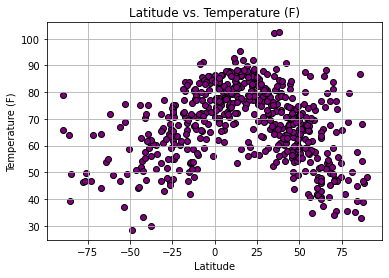

In [235]:
plt.scatter(output_df['Latitude'], output_df['Temperature (F)'], marker='o', facecolors='purple', edgecolors='black')
plt.title('Latitude vs. Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig("01_latVtemp", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

## Latitude vs. Humidity Plot

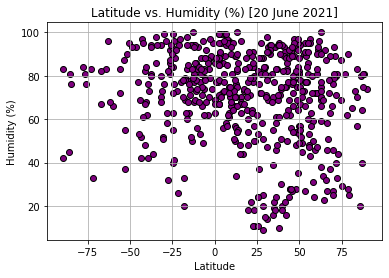

In [263]:
plt.scatter(output_df['Latitude'], output_df['Humidity (%)'], marker='o', facecolors='purple', edgecolors='black')
plt.title('Latitude vs. Humidity (%) [20 June 2021]')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("02_latVhumid", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

## Latitude vs. Cloudiness Plot

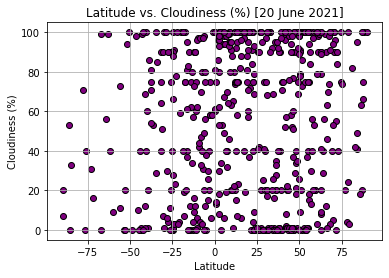

In [264]:
plt.scatter(output_df['Latitude'], output_df['Cloudiness (%)'], marker='o', facecolors='purple', edgecolors='black')
plt.title('Latitude vs. Cloudiness (%) [20 June 2021]')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("03_latVclouds", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

## Latitude vs. Wind Speed Plot

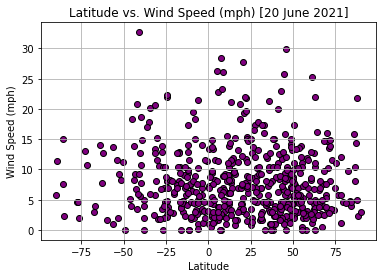

In [265]:
plt.scatter(output_df['Latitude'], output_df['Wind Speed (mph)'], marker='o', facecolors='purple', edgecolors='black')
plt.title('Latitude vs. Wind Speed (mph) [20 June 2021]')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("04_latVwind", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

## Linear Regression

In [215]:
# divide data into hemispheres
north_df = weather_df.loc[weather_df['Latitude'] > 0, :]
south_df = weather_df.loc[weather_df['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

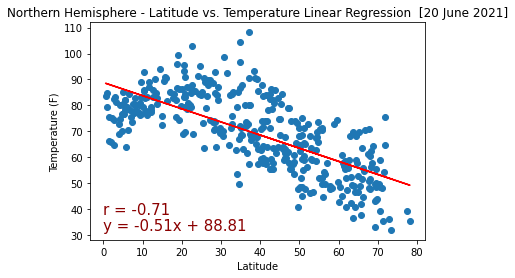

In [266]:
x_values = north_df['Latitude']
y_values = north_df['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,32),fontsize=15,color="darkred")
plt.annotate(f'r = {round(correlation[0],2)}', (0,38),fontsize=15,color="darkred")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Latitude vs. Temperature Linear Regression  [20 June 2021]')
plt.savefig("05_NorthLatTemp", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

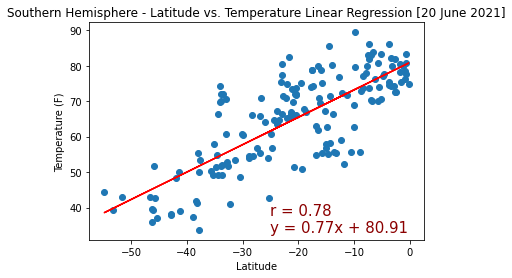

In [267]:
x_values = south_df['Latitude']
y_values = south_df['Temperature (F)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,33),fontsize=15,color="darkred")
plt.annotate(f'r = {round(correlation[0],2)}', (-25,38),fontsize=15,color="darkred")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Latitude vs. Temperature Linear Regression [20 June 2021]')
plt.savefig("06_SouthLatTemp", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

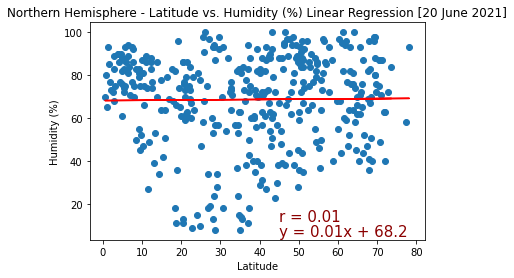

In [268]:
x_values = north_df['Latitude']
y_values = north_df['Humidity (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="darkred")
plt.annotate(f'r = {round(correlation[0],2)}', (45,12),fontsize=15,color="darkred")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Latitude vs. Humidity (%) Linear Regression [20 June 2021]')
plt.savefig("07_NorthLatHumid", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

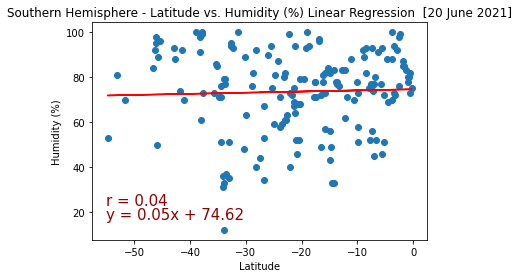

In [269]:
x_values = south_df['Latitude']
y_values = south_df['Humidity (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=15,color="darkred")
plt.annotate(f'r = {round(correlation[0],2)}', (-55,23),fontsize=15,color="darkred")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Latitude vs. Humidity (%) Linear Regression  [20 June 2021]')
plt.savefig("08_SouthLatHumid", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

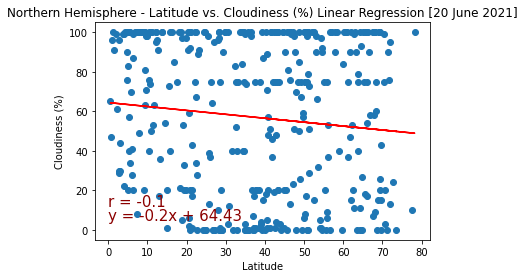

In [270]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="darkred")
plt.annotate(f'r = {round(correlation[0],2)}', (0,12),fontsize=15,color="darkred")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression [20 June 2021]')
plt.savefig("09_NorthLatClouds", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

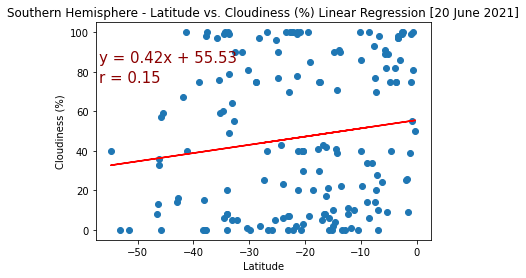

In [271]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness (%)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,85),fontsize=15,color="darkred")
plt.annotate(f'r = {round(correlation[0],2)}', (-57,75),fontsize=15,color="darkred")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression [20 June 2021]')
plt.savefig("10_SouthLatClouds", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

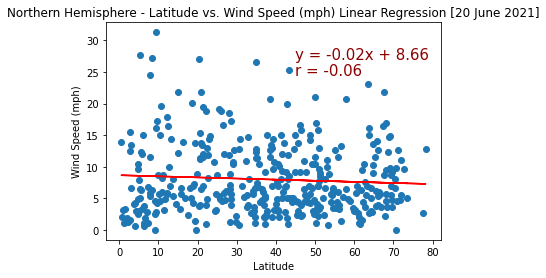

In [272]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed (mph)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,27),fontsize=15,color="darkred")
plt.annotate(f'r = {round(correlation[0],2)}', (45,24.5),fontsize=15,color="darkred")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression [20 June 2021]')
plt.savefig("11_NorthLatWind", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

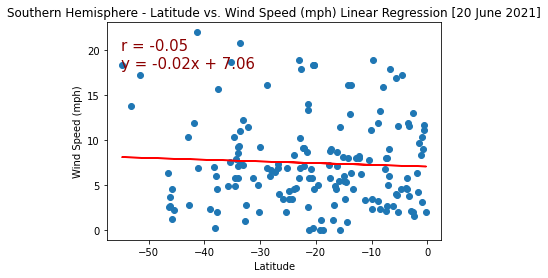

In [273]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed (mph)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="darkred")
plt.annotate(f'r = {round(correlation[0],2)}', (-55,20),fontsize=15,color="darkred")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression [20 June 2021]')
plt.savefig("12_SouthLatWind", dpi=None, facecolor='w', format=None, transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()